#### <font color='purple'><b>Import Libraries :
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import FunctionTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle
import warnings
warnings.filterwarnings('ignore')

#### <font color='purple'><b>Load the dataset :

In [669]:
bike = pd.read_csv('bike_rent.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


### <font color='magenta'><b>Data Preprocessing :

#### <font color='hotpink'><b>Check for special characters in the dataset and replace it with nan :

In [670]:
bike.replace('[~`!@#$%^&*()_+{}\[\]:;"\'<>,?/\\|]', np.nan, regex=True, inplace=True)

In [4]:
bike.isna().sum().sum()

48

In [209]:
bike.isnull().sum().sort_values(ascending=False)

temp          11
season         6
atemp          6
hum            6
workingday     5
windspeed      5
weathersit     4
yr             1
mnth           1
holiday        1
casual         1
registered     1
hr             0
weekday        0
cnt            0
dtype: int64

In [671]:
bike.drop(['instant','dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,NaN,0,5,27,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


#### <font color='hotpink'><b>Check for Duplicates :

In [198]:
bike.duplicated().sum()

2

In [11]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7958,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
8126,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
13559,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6
13727,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6


In [672]:
bike.drop_duplicates(keep='first',inplace=True)

In [13]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### <font color='magenta'><b>Exploratory Data Analysis :

In [200]:
bike.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [201]:
bike.shape

(17377, 15)

In [202]:
len(bike)

17377

In [203]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      17371 non-null  object
 1   yr          17376 non-null  object
 2   mnth        17376 non-null  object
 3   hr          17377 non-null  int64 
 4   holiday     17376 non-null  object
 5   weekday     17377 non-null  int64 
 6   workingday  17372 non-null  object
 7   weathersit  17373 non-null  object
 8   temp        17366 non-null  object
 9   atemp       17371 non-null  object
 10  hum         17371 non-null  object
 11  windspeed   17372 non-null  object
 12  casual      17376 non-null  object
 13  registered  17376 non-null  object
 14  cnt         17377 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 2.1+ MB


In [204]:
bike.dtypes

season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [673]:
bike[['temp','atemp','hum','windspeed']] = bike[['temp','atemp','hum','windspeed']].apply(pd.to_numeric)

In [674]:
bike[['casual','registered']] = bike[['casual','registered']].apply(pd.to_numeric)
bike['casual'] = bike['casual'].fillna(0).astype(int)
bike['registered'] = bike['registered'].fillna(0).astype(int)

In [675]:
bike['hr'] = bike['hr'].astype(str)
bike['weekday'] = bike['weekday'].astype(str)

In [658]:
bike['weekday'] = bike['weekday'].astype(str)

In [676]:
bike.dtypes

season         object
yr             object
mnth           object
hr             object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int32
registered      int32
cnt             int64
dtype: object

In [680]:
df = bike.copy()

In [208]:
df.select_dtypes(include='float64').describe()

,temp,atemp,hum,windspeed
count,17366.000000,17371.000000,17371.000000,17372.000000
mean,0.497137,0.475856,0.627195,0.190091
std,0.192522,0.171828,0.192944,0.122324
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#### <font color='purple'><b>Univariate analysis :

#### <font color='orange'><b><I> To impute the missing values in numerical columns :

#### <font color='maroon'><b>Histogram :

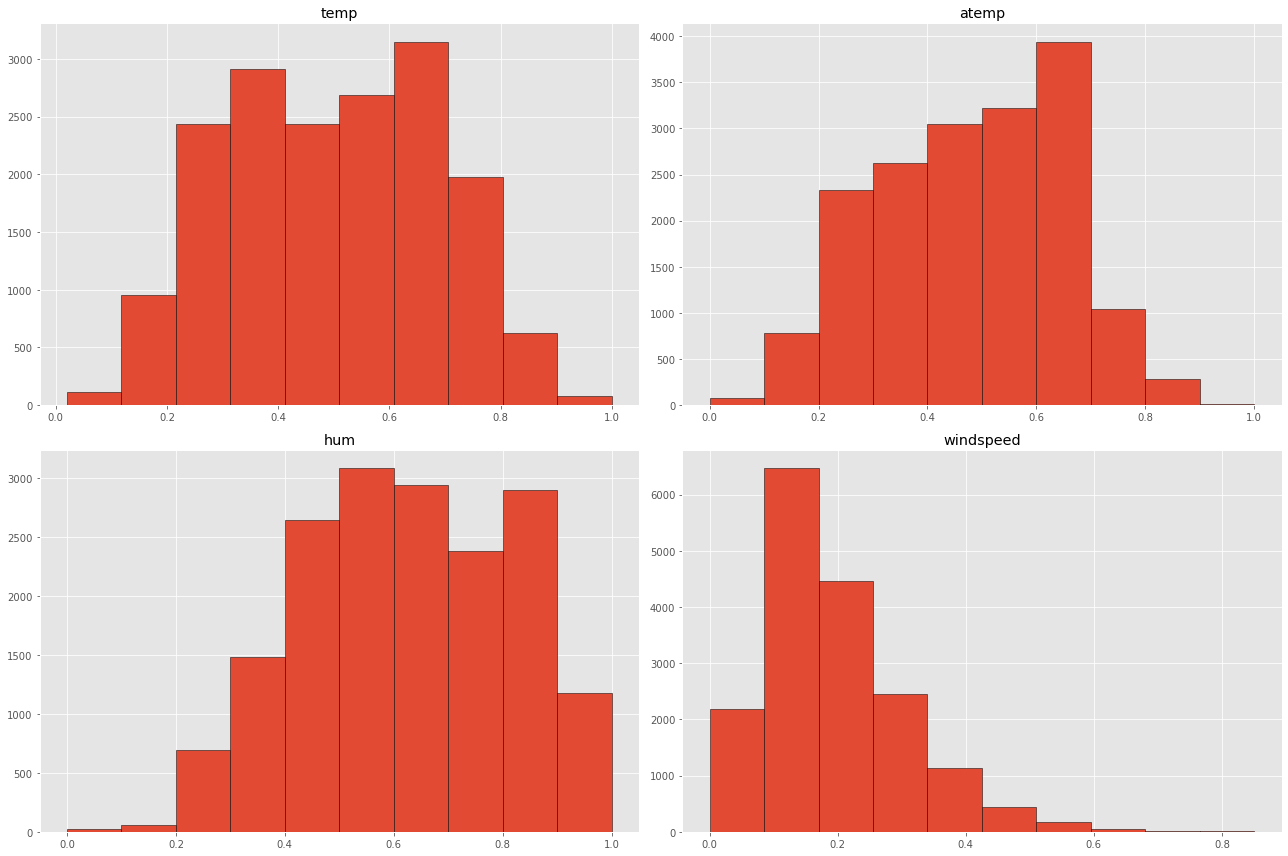

In [137]:
df.select_dtypes(include='float64').hist(edgecolor='k',figsize=(18,12))
plt.tight_layout();

<font color='brown'><b><I> From the plots, temp and atemp are normally distributed and humidity and windspeed look left and right-skewed. 

<font color='brown'><b><I>So using mean value to impute the missing values of temp and atemp and median value to impute the missing values of humidity and windspeed.

In [681]:
df[['temp','atemp']] = df[['temp','atemp']].fillna(df[['temp','atemp']].mean()) 

In [682]:
df[['hum','windspeed']] = df[['hum','windspeed']].fillna(df[['hum','windspeed']].median()) 

<font color='brown'><b><I>Impute missing values of categorical columns with mode

In [684]:
cols = ['season','workingday','weathersit','yr','mnth','holiday']
df[cols] = df[cols].fillna(df.mode().iloc[0])

In [685]:
df.isna().sum().sum()

0

#### <font color='orange'><b>Check for Outliers :

#### <font color='maroon'><b>Box plot :

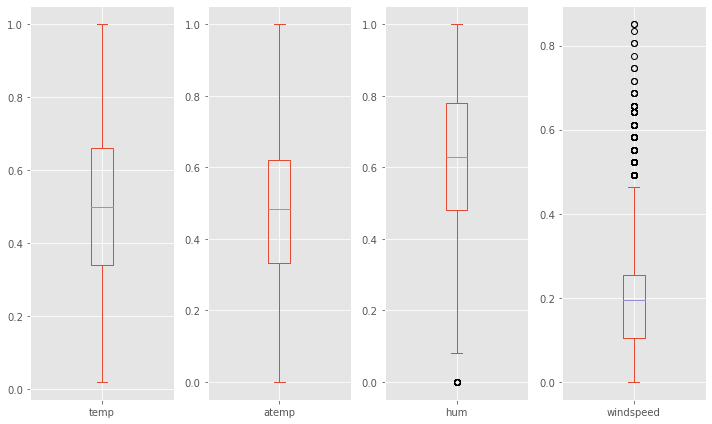

In [138]:
df.select_dtypes(include='float64').plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

<font color='brown'><b><I> There is one outlier on the humidity column on the lower side and a few a outliers on the windspeed column on the higher side.

#### <font color='purple'><b>Capping of Outliers :

<font color='brown'><b><I>Using IQR method for humidity column :

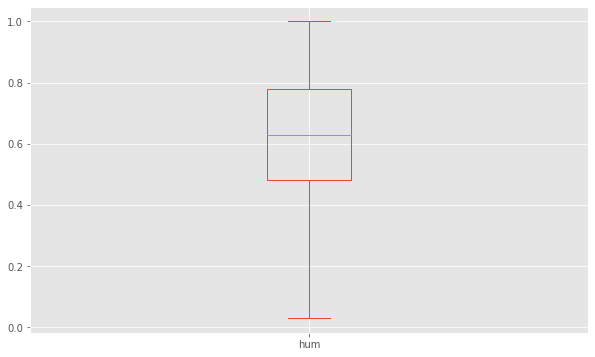

In [687]:
Q1 = df['hum'].quantile(0.25)
Q3 = df['hum'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['hum'] = df['hum'].clip(lower=lower_bound, upper=upper_bound)
df['hum'].plot(kind='box',figsize=(10,6));

<font color='brown'><b><I>Using Winsorization method for windspeed column :

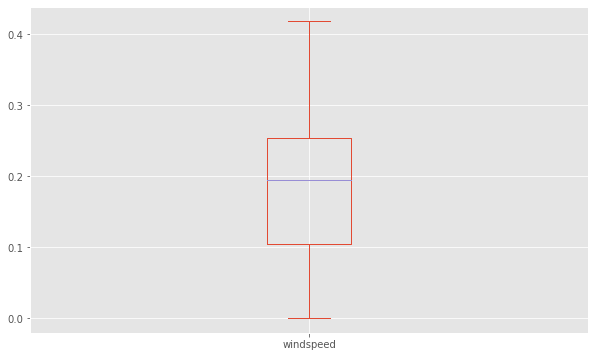

In [689]:
# at 5% and 95% percentiles
df['windspeed'] = winsorize(df['windspeed'],limits=[0.05,0.05])
df['windspeed'].plot(kind='box',figsize=(10,6));

#### <font color='purple'><b>Bivariate analysis :

#### <font color='maroon'><b>Scatter plot :

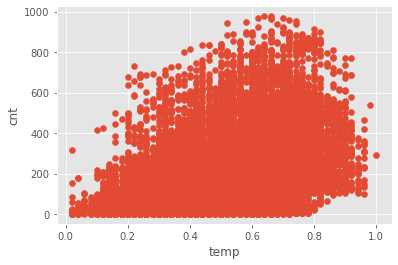

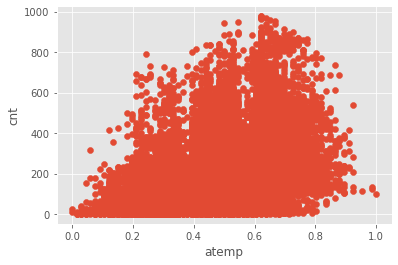

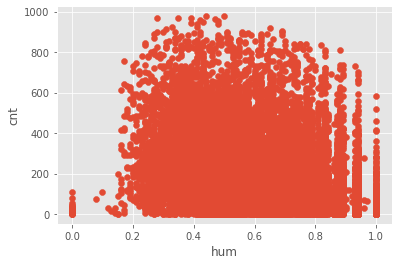

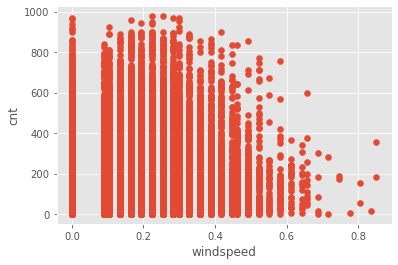

In [177]:
dependent_var = "cnt"
independent_vars = ['temp','atemp','hum','windspeed']


for var in independent_vars:
    plt.scatter(df[var],df[dependent_var])
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

<font color='brown'><b><I>From the plots, count and windspeed and count and humidity have no linear relationship. cnt and temp and atemp have slightly linear relationship.

#### <font color='maroon'><b>Pairplot :

<Figure size 1440x1440 with 0 Axes>

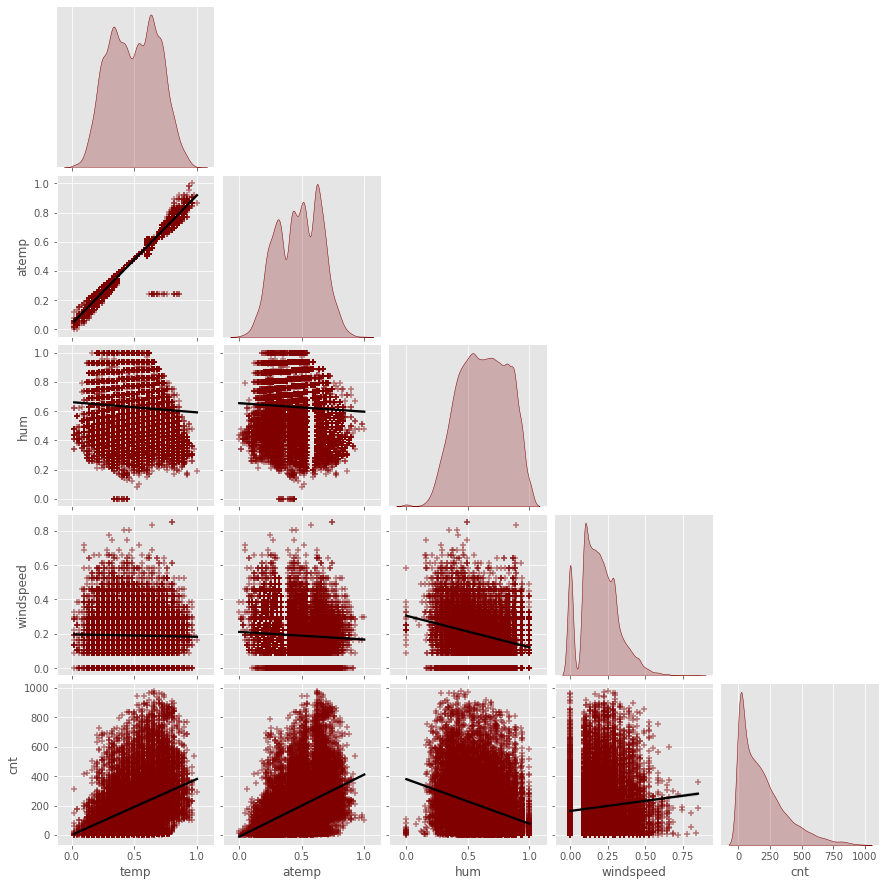

In [139]:
plt.figure(figsize=(20,20))
sns.pairplot(df.select_dtypes(include='float64').join(df['cnt']),markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'maroon'}},
               corner=True,
                 diag_kws= {'color': 'maroon'})
plt.show()

#### <font color='maroon'><b>Heatmap :

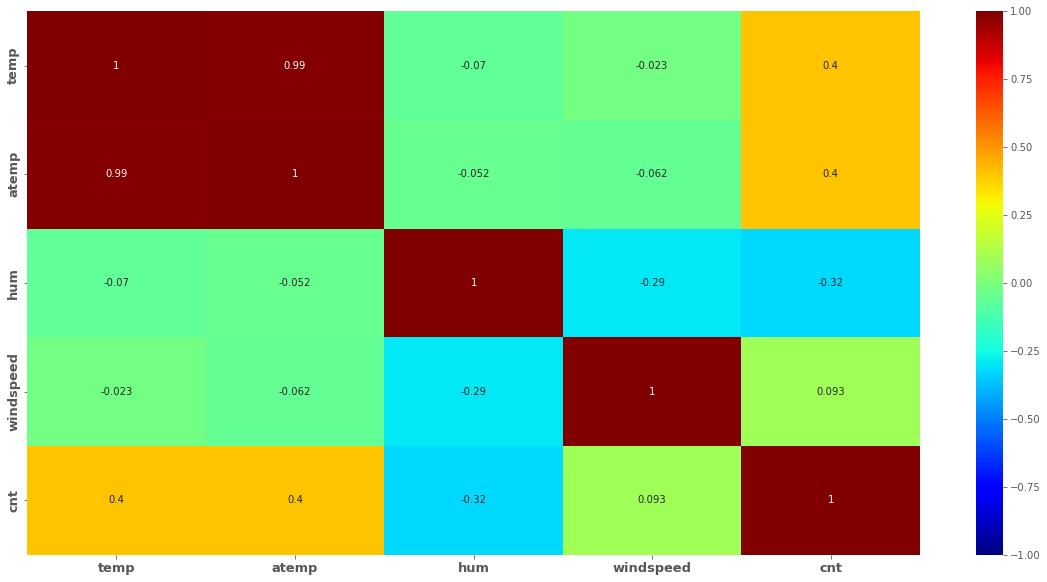

In [136]:
correlation = df.select_dtypes(include='float64').join(df['cnt']).corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(data=correlation,annot=True,vmax=1,vmin=-1,cmap='jet')
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold');

<font color='brown'><b><I>From the above plots, temp and atemp are strongly correlated to each other. And none of the independent variables are strongly correlated with the dependent variable count.

#### <font color='purple'>Check for Multicollinearity :
- <font color='peach'><b><I>You can detect high-multi-collinearity by inspecting the eigen values of correlation matrix. A very low eigen value shows that the data are collinear, and the corresponding eigen vector shows which variables are collinear.

- <font color='peach'><b><I>If there is no collinearity in the data, you would expect that none of the eigen values are close to zero

In [140]:
w, v = np.linalg.eig(correlation)
w

array([2.28513799, 0.01153075, 1.37540505, 0.76986036, 0.55806585])

<font color='peach'><b><I>The 2nd eigen value is close to zero. The corresponding eigen vector is :

In [141]:
v[:,1]

array([ 0.70593566, -0.70774748,  0.00566738, -0.02664602,  0.00249242])

<font color='peach'><b><I>In the eigen vectors we look for numbers not close to zero. Here the first and second vectors are not close to zero which corresponds to temp and atemp variables. Hence temp are atemp are collinear.

#### <font color='purple'><b>Visualizing categorical variables with the target variable :

#### <font color='maroon'><b>Bar plot :

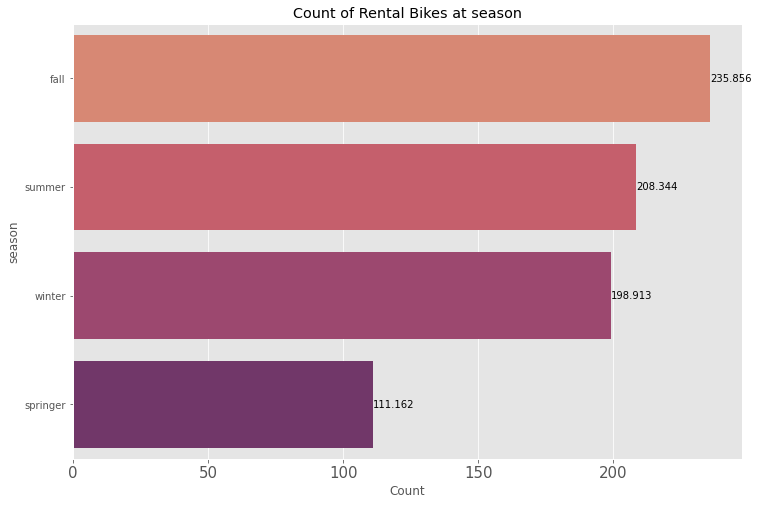

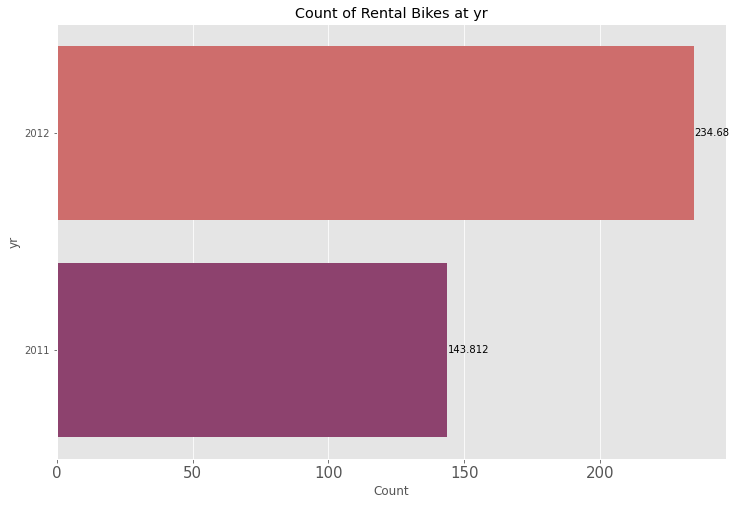

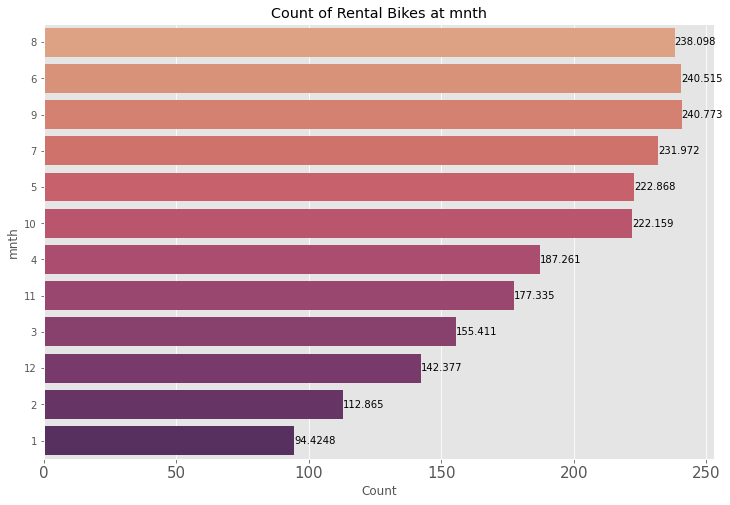

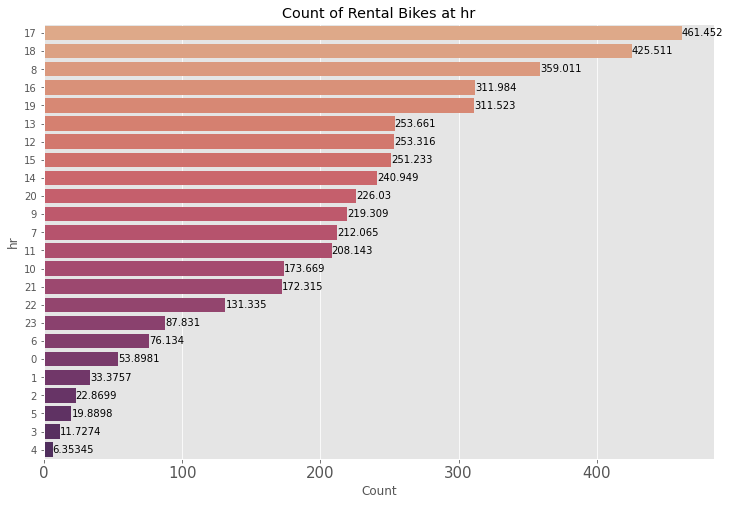

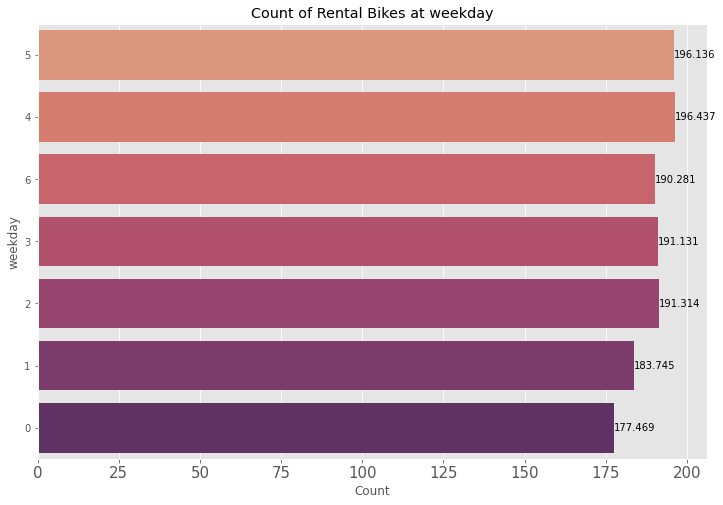

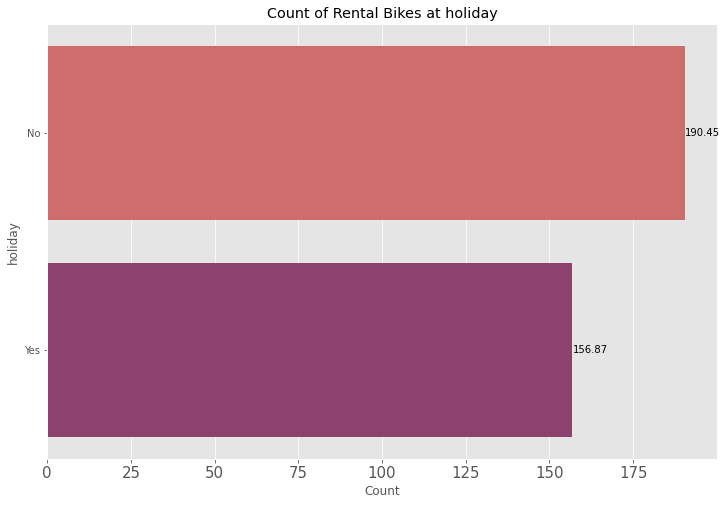

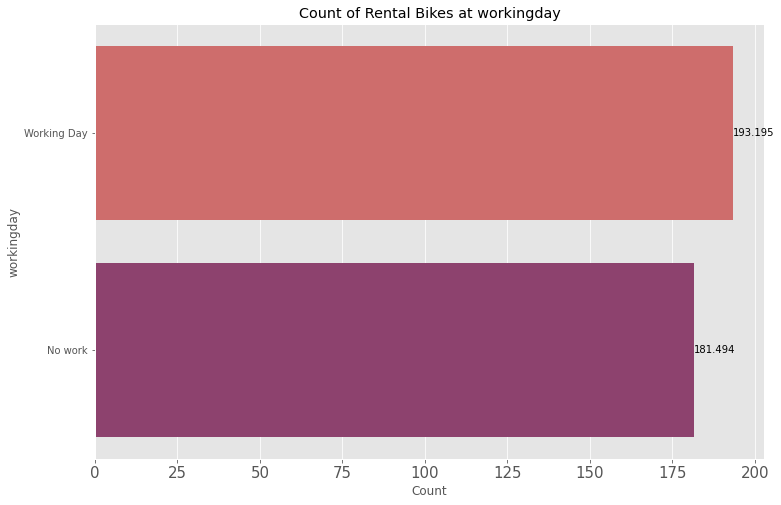

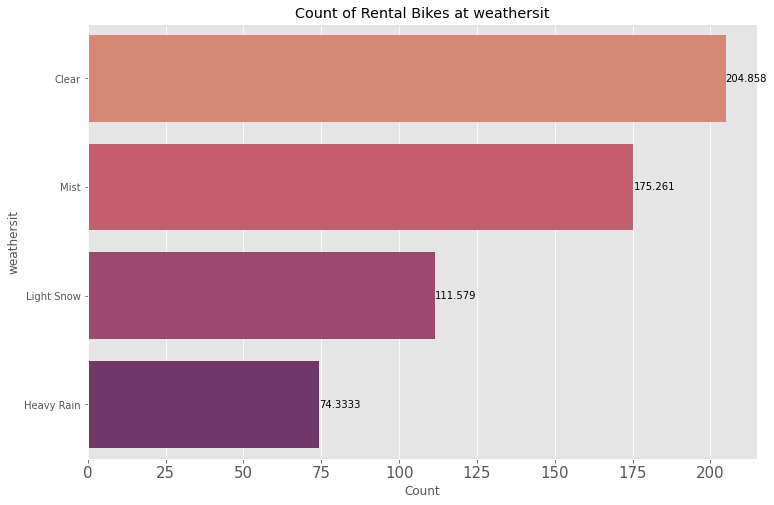

In [692]:
cols = ['season', 'yr', 'mnth','hr','weekday', 'holiday', 'workingday', 'weathersit']
for col in cols:
    plt.figure(figsize=(12, 8))
    order=df.groupby([col])['cnt'].sum().sort_values(ascending=False).index
    ax = sns.barplot(y=col, x='cnt',data=df,palette='flare',ci=None,order=order)
    plt.xticks(fontsize=15)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'Count of Rental Bikes at {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

<font color='brown'><b><I>Count of rental bikes at different seasons, year, month, holiday, workingday and weather condition has been shown above.
    
<font color='brown'><b><I>  The bike rental count is highest during fall season, follwed by summer, winter and lowest at spring season.
    
<font color='brown'><b><I>    The year 2012 has higher count compared to 2011.
    
<font color='brown'><b><I>    Monthwise September month has highest count and January has the lowest.
    
<font color='brown'><b><I>   The rental count has been higher during working days compared to holidays and at morning and evening hours.
     
<font color='brown'><b><I>    The rental count is higher when the weather is clear. Gradually decreases when there is mist and light snow. Lowest when there is heavy rain.

#### <font color='maroon'><b>Point plot :

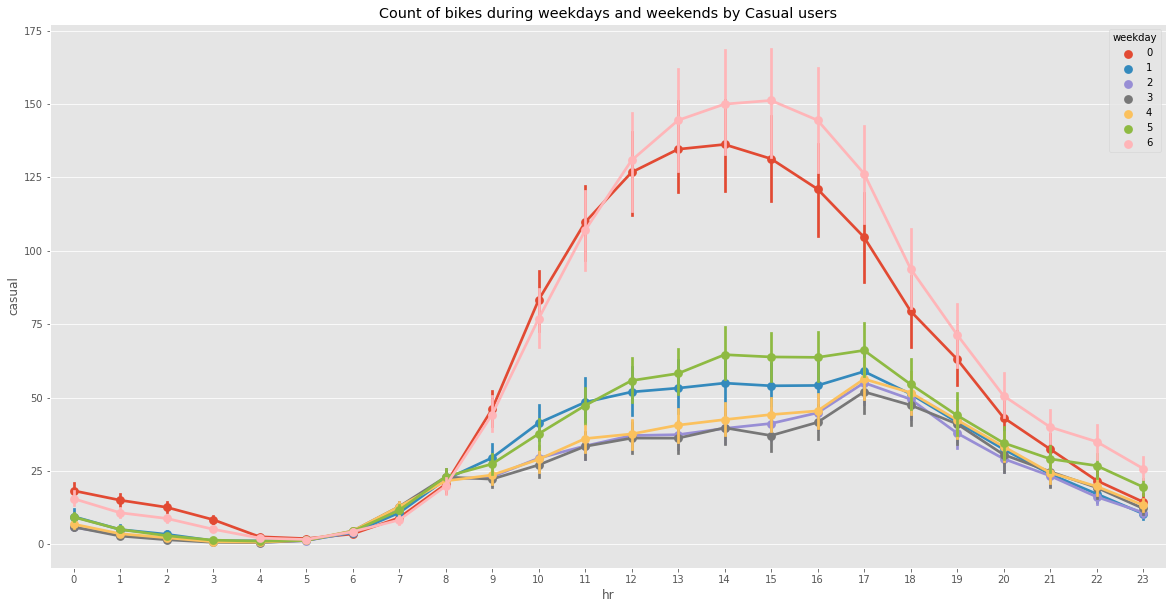

In [317]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends by Casual users');

<font color='brown'><b><I>From the pink and red line on the graph which represent saturday and sunday there are huge number of casual users in the weekend mid day hours.

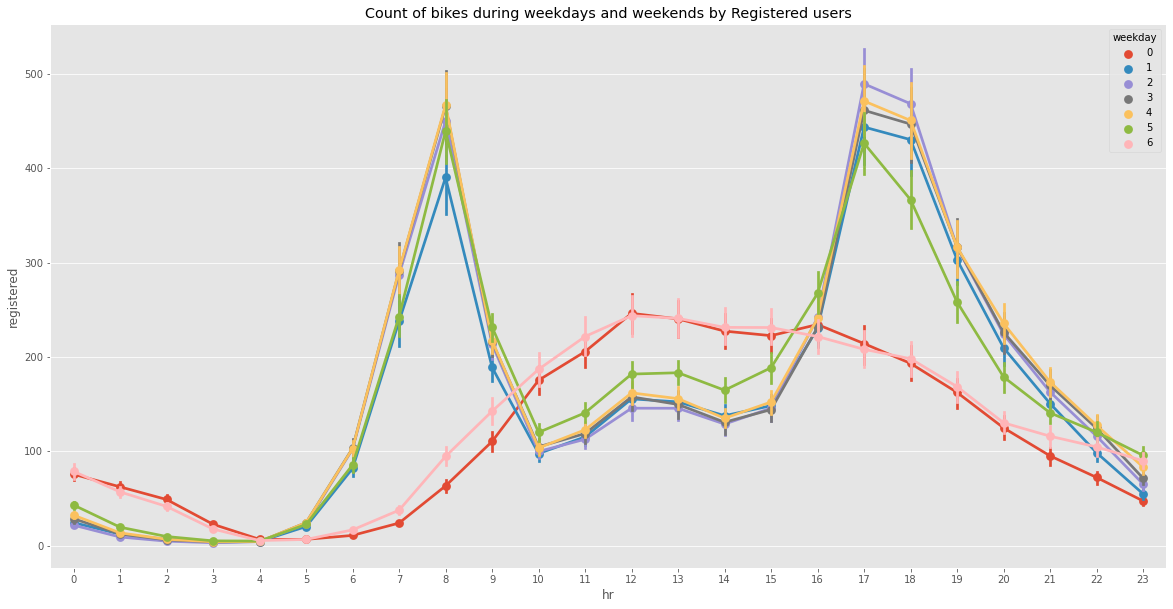

In [318]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends by Registered users');

<font color='brown'><b><I>There are huge number of registered users in the morning and evening hours during weekdays.

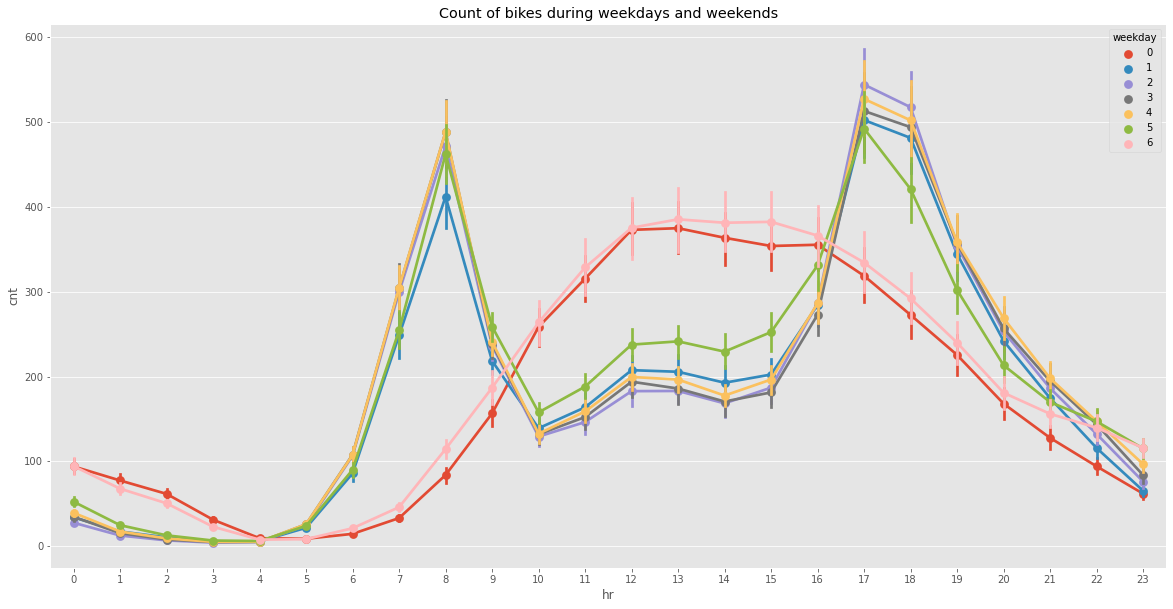

In [229]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr',y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends');

<font color='brown'><b><I>On weekdays, we observe a peak in the morning hours and in the evening.

<font color='brown'><b><I>On weekends, the peak value is in the afternoon.

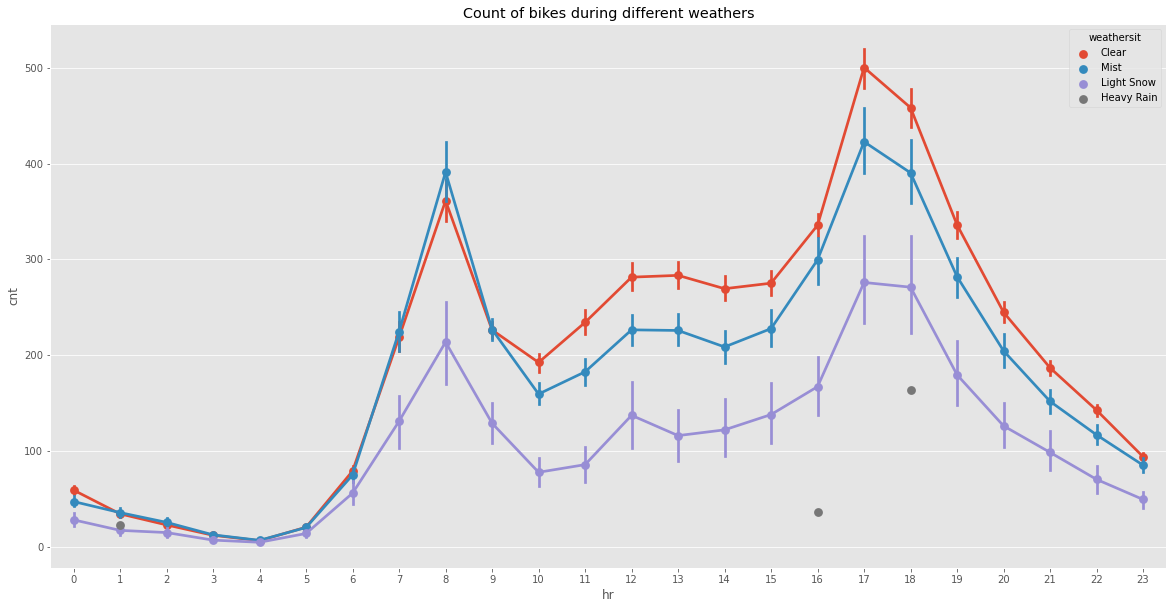

In [234]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Count of bikes during different weathers');

<font color='brown'><b><I>The upper red line is the clear weather. The two dots are when weather is heavy rain, hence no bookings.

### <font color='purple'><b>Feature Engineering :

In [824]:
df1 = df.copy()

#### <font color='orange'><b>Dropping the reduntant columns :

In [825]:
df1.drop(['casual','registered'],axis=1,inplace=True)
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,1


#### <font color='orange'><b>Dropping one of the Collinear column :

In [826]:
df1.drop(['atemp'],axis=1,inplace=True)

In [255]:
df1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.81,0.0,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.80,0.0,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.63,0.0,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.75,0.0,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.75,0.0,1


#### <font color='orange'><b>Split into Independent and Dependent variables :

In [1554]:
x = df1.drop(['cnt'],axis=1)
y = df1['cnt']

#### <font color='orange'><b>Split into Train and Test data :

In [828]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [258]:
x_train.shape, x_test.shape

((13901, 11), (3476, 11))

#### <font color='maroon'><b>One-Hot Encoding the Categorical columns :

In [767]:
categorical_cols = ['season', 'yr', 'mnth','hr', 'holiday','weekday', 'workingday', 'weathersit']

In [829]:
ohe = OneHotEncoder(sparse=False)

In [830]:
x_train_enc = ohe.fit_transform(x_train[categorical_cols])
x_test_enc = ohe.transform(x_test[categorical_cols])

In [831]:
x_train_cat = pd.DataFrame(x_train_enc, columns=ohe.get_feature_names(categorical_cols))

In [702]:
x_train_cat.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [832]:
x_test_cat = pd.DataFrame(x_test_enc, columns=ohe.get_feature_names(categorical_cols))

#### <font color='maroon'><b>MinMaxScaling the Numerical columns :

In [926]:
from sklearn.preprocessing import MinMaxScaler

In [704]:
numerical_cols = ['temp','hum','windspeed']

In [959]:
scaler = MinMaxScaler()

In [960]:
x_train_scl = scaler.fit_transform(x_train[numerical_cols])
x_test_scl = scaler.transform(x_test[numerical_cols])

In [961]:
x_train_num = pd.DataFrame(x_train_scl, columns=numerical_cols)
x_test_num = pd.DataFrame(x_test_scl, columns=numerical_cols)

<font color='orange'><b>Concatenate the categorical and numerical columns :

In [962]:
x_train1 = pd.concat([x_train_cat,x_train_num],axis=1)
x_train1.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.530612,0.762887,0.250060
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.591837,0.546392,0.321369
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.816327,0.505155,0.607083
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.591837,0.876289,0.607083
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.632653,0.484536,0.857143


In [963]:
x_test1 = pd.concat([x_test_cat,x_test_num],axis=1)
x_test1.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_6,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.183673,0.422680,0.607083
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.612245,0.680412,0.321369
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.612245,0.773196,0.250060
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.510204,0.938144,0.464226
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.591837,0.773196,0.464226


### <font color='magenta'><b>Feature Selection and Model Building:

#### <font color='purple'><b>Univariate Selection :

#### <font color='green'><b>Linear Regression with raw data :

In [1011]:
model = LinearRegression()

In [1012]:
model.fit(x_train1,y_train)

LinearRegression()

<font color='cyan'><b>R2 :

In [1414]:
r2_raw_train = model.score(x_train1,y_train)
print(f'R2 of train set = {r2_raw_train:.4f}')

R2 of train set = 0.6860


In [1413]:
r2_raw_test = model.score(x_test1,y_test)
print(f'R2 of test set = {r2_raw_test:.4f}')

R2 of test set = 0.6814


#### <font color='maroon'><b>Feature Selection with f_regression :

<font color='orange'><b><I>p values :

In [1022]:
f_values, p_values = f_regression(x_train1,y_train,center=True)
print(p_values)

[1.96428396e-075 2.27771241e-186 1.42640073e-010 2.20873336e-004
 1.06444943e-190 1.06444943e-190 1.24572178e-078 1.17531148e-010
 1.15104310e-002 6.25490306e-021 3.79129028e-049 7.21521342e-009
 3.81383580e-001 1.39176746e-009 7.06001679e-021 2.41973264e-018
 2.63867761e-020 3.22345105e-031 4.44934050e-076 3.21825529e-104
 2.46989503e-002 3.24018419e-003 3.22712409e-019 1.43160927e-015
 1.83201098e-014 1.01092898e-014 2.22910868e-058 0.00000000e+000
 7.92738124e-218 2.15123151e-062 5.73276743e-112 1.03259942e-007
 6.72461178e-003 9.49324293e-016 3.13160363e-046 1.99934374e-125
 7.12143259e-135 6.92795425e-116 4.38461970e-053 3.08259983e-003
 3.17918694e-120 1.32238853e-004 1.80546418e-005 1.80546418e-005
 3.65907068e-003 2.86715052e-001 6.17077186e-001 6.11033573e-001
 1.35349347e-001 3.22769682e-001 6.35220586e-001 7.98582520e-004
 7.98582520e-004 4.12981883e-051 4.82313102e-001 1.09005289e-048
 1.60163680e-012 0.00000000e+000 0.00000000e+000 2.35653915e-034]


<font color='orange'><b><I>Features with p value less than 0.05 :

In [1023]:
selected_features = x_train1.columns[p_values < 0.05]
print(selected_features)
print('No. of columns selected = ',len(selected_features))

Index(['season_fall', 'season_springer', 'season_summer', 'season_winter',
       'yr_2011', 'yr_2012', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'hr_0', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'holiday_No', 'holiday_Yes', 'weekday_0', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist', 'temp', 'hum', 'windspeed'],
      dtype='object')
No. of columns selected =  52


In [1024]:
x_train_selected = x_train1[selected_features]
x_train_selected.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.530612,0.762887,0.250060
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.591837,0.546392,0.321369
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.816327,0.505155,0.607083
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.591837,0.876289,0.607083
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.632653,0.484536,0.857143


#### <font color='purple'><b>Bivariate Selection :

#### <font color='maroon'><b>Recursive Feature Elimination with cross validation :

In [1471]:
rfe = RFECV(estimator=model,step=1,cv=cv,scoring='neg_mean_squared_error')

In [1026]:
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [1472]:
rfe.fit(x_train_selected,y_train)

RFECV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
      estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [1473]:
print('Selected Features :')
print(x_train_selected.columns[rfe.support_])
print(len(x_train_selected.columns[rfe.support_]))
print('Feature Ranking :')
print(rfe.ranking_)

Selected Features :
Index(['season_fall', 'season_springer', 'season_summer', 'season_winter',
       'yr_2011', 'yr_2012', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_7', 'mnth_8', 'mnth_9', 'hr_0',
       'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'holiday_No',
       'holiday_Yes', 'weekday_0', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist', 'temp', 'hum', 'windspeed'],
      dtype='object')
51
Feature Ranking :
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [1474]:
x_train_selected2 = pd.DataFrame(rfe.transform(x_train_selected),columns=x_train_selected.columns[rfe.support_])
x_train_selected2.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_Yes,weekday_0,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,temp,hum,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.530612,0.762887,0.250060
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.591837,0.546392,0.321369
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.816327,0.505155,0.607083
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.591837,0.876289,0.607083
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.632653,0.484536,0.857143


 <font color='green'><b>Linear Regression with Selected features :

In [1032]:
lr = LinearRegression()

In [1033]:
lr.fit(x_train_selected2,y_train)

LinearRegression()

<font color='cyan'><b>R2 :

In [1410]:
r2_lr_train = lr.score(x_train_selected2,y_train)
print(f'R2 of train set = {r2_lr_train:.4f}')

R2 of train set = 0.6859


<font color='purple'><b><I>Applying other univariate selection techniques :

#### <font color='maroon'><b>Feature Selection of Categorical columns with chi2 test :

<font color='orange'><b><I>p values :

In [1444]:
chi2_stats, p_values2 = chi2(x_train_cat,y_train)
print(p_values2)

[2.06609713e-005 2.35842364e-022 9.99324445e-001 9.99492264e-001
 8.75294483e-001 9.05225847e-001 3.71442398e-001 1.76699157e-006
 9.99999965e-001 1.00000000e+000 9.87189035e-001 5.28242025e-001
 9.97745718e-001 2.32813637e-003 2.70228143e-005 6.44618512e-005
 6.60047423e-008 5.74107107e-017 3.26450796e-014 1.59751886e-037
 2.19960231e-002 1.85811632e-001 6.69362136e-010 1.72357543e-008
 2.53288801e-008 4.79222660e-011 6.78579866e-040 0.00000000e+000
 1.66435276e-268 5.57889846e-050 7.30022665e-032 1.06200202e-002
 1.25110234e-001 8.57368588e-002 3.25599691e-006 2.32705775e-135
 1.87137514e-298 2.55567233e-062 9.72202512e-001 3.03595097e-003
 2.59040347e-177 3.39973165e-005 1.00000000e+000 1.00000000e+000
 9.84615382e-001 9.34503848e-001 9.27067429e-001 9.92852580e-001
 7.00628561e-001 9.99679305e-001 9.67834420e-001 9.98769061e-001
 1.00000000e+000 1.00000000e+000 1.00000000e+000 9.99995909e-001
 1.00000000e+000]


In [1445]:
selected_features2 = x_train_cat.columns[p_values2 < 0.05]
print(selected_features2)
print('No. of columns selected = ',len(selected_features2))

Index(['season_fall', 'season_springer', 'mnth_10', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'hr_0', 'hr_1', 'hr_10', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20',
       'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_7', 'hr_8', 'hr_9'],
      dtype='object')
No. of columns selected =  28


In [1446]:
x_train_selected_chi = pd.concat([x_train1[selected_features2],x_train_num],axis=1)
x_train_selected_chi.head()

,season_fall,season_springer,mnth_10,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,hr_0,hr_1,...,hr_23,hr_3,hr_4,hr_5,hr_7,hr_8,hr_9,temp,hum,windspeed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.530612,0.762887,0.250060
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.591837,0.546392,0.321369
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816327,0.505155,0.607083
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.591837,0.876289,0.607083
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632653,0.484536,0.857143


<font color='green'><b>Linear Regression after Chi2 Test :

In [1447]:
lr_chi = LinearRegression()

In [1448]:
lr_chi.fit(x_train_selected_chi,y_train)

LinearRegression()

In [1450]:
r2_chi_train = lr_chi.score(x_train_selected_chi,y_train)
print(f'R2 of train set = {r2_chi_train:.4f}')

R2 of train set = 0.6165


#### <font color='maroon'><b>Checking for Variance Inflation Factor :

In [1454]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif['features'] = x_train1.columns
#sel_fe = vif[vif['VIF Factor']<5]['features'].tolist()
vif['VIF Factor'] = np.round(vif['VIF Factor'],2)
vif = vif.sort_values(by='VIF Factor',ascending=False)
vif

,VIF Factor,features
4,inf,yr_2011
5,inf,yr_2012
54,1.180653e+12,weathersit_Heavy Rain
21,4.250303e+10,hr_11
23,3.610896e+10,hr_13
18,1.545470e+10,hr_0
31,1.040274e+10,hr_20
10,8.070634e+09,mnth_2
36,7.580439e+09,hr_4
28,7.558455e+09,hr_18


<font color='brown'><b><I>yr_2011 and yr_2012 have inflated values which means they are highly correlated. So dropping one of the columns.

In [1137]:
x_train2 = x_train1.copy()
x_train2.drop(['yr_2011'],axis=1,inplace=True)

<font color='maroon'><b>Checking for vif again

In [1457]:
vif2 = pd.DataFrame()
vif2['VIF Factor'] = [variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])]
vif2['features'] = x_train2.columns
vif2['VIF Factor'] = np.round(vif2['VIF Factor'],2)
vif2 = vif2.sort_values(by='VIF Factor',ascending=False)
vif2

,VIF Factor,features
0,inf,season_fall
20,inf,hr_13
22,inf,hr_15
1,inf,season_springer
24,inf,hr_17
25,inf,hr_18
26,inf,hr_19
27,inf,hr_2
28,inf,hr_20
29,inf,hr_21


<font color='brown'><b><I>After dropping yr_2011 now there are lot of inflated values now.

#### <font color='maroon'><b>Check for pairwise correlations :

In [1458]:
corr_matrix = x_train2.corr()
#print(corr_matrix)

In [1459]:
# find highly correlated variables
corr_threshold = 0.7 # set the correlation threshold
high_corr = set() # initialize a set to hold highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            pair = (min(colname_i, colname_j), max(colname_i, colname_j))
            high_corr.add(pair)

# print highly correlated variables
if len(high_corr) > 0:
    print('Highly correlated variables:')
    for pair in high_corr:
        print(pair)
else:
    print('No highly correlated variables found.')

No highly correlated variables found.


#### <font color='maroon'><b>Checking the Co-efficients of all the predictor variables :

In [1066]:
model.coef_

array([ 5.86153802e+13,  5.86153802e+13,  5.86153802e+13,  5.86153802e+13,
        6.79950769e+14,  6.79950769e+14, -4.67378270e+14, -4.67378270e+14,
       -4.67378270e+14, -4.67378270e+14, -4.67378270e+14, -4.67378270e+14,
       -4.67378270e+14, -4.67378270e+14, -4.67378270e+14, -4.67378270e+14,
       -4.67378270e+14, -4.67378270e+14,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  2.02937775e+13,  2.02937775e+13,
        2.02937775e+13,  2.02937775e+13,  6.87507661e+12,  6.87507661e+12,
        9.33327179e+13,  9.33327179e+13,  9.33327179e+13,  9.33327179e+13,
        9.33327179e+13,  9.33327179e+13,  9.33327179e+13,  4.71148998e+14,
        4.71148998e+14, -

<font color='brown'><b><I>Since all the co-efficients are very low in exponential form, the predictor variables may be non-linear with the target variable.

#### <font color='green'><b>Linear Regression with Log Transformation of all the predictor variables :

In [976]:
def add_small_value(x):
    return x+1e-9

In [1097]:
trans = FunctionTransformer(add_small_value)
x_log = np.log(trans.transform(x_train1))

In [1095]:
y_log = np.log(y_train)

In [1098]:
lr_log = LinearRegression().fit(x_log,y_log)

In [1099]:
y_pred_log_train = lr_log.predict(x_log)

In [1102]:
x_log_test = np.log(trans.transform(x_test1))

In [1105]:
y_log_test = np.log(y_test)

In [1103]:
y_pred_log_test = lr_log.predict(x_log_test)

<font color='cyan'><b>R2 :

In [1393]:
r2_log = r2_score(y_pred_log_train,y_log)
print(f'R2 of train set = {r2_log:.4f}')

R2 of train set = 0.7793


In [1392]:
r2_log_test = r2_score(y_pred_log_test,y_log_test)
print(f'R2 of train set = {r2_log_test:.4f}')

R2 of train set = 0.7742


<font color='purple'><b>Applying non-linear feature selection technique :

#### <font color='maroon'><b>Feature Selection with Decision Tree :

In [1129]:
dt_regressor = DecisionTreeRegressor(random_state=0)

In [1130]:
dt_regressor.fit(x_train1,y_train)

DecisionTreeRegressor(random_state=0)

In [1460]:
p_values3 = dt_regressor.feature_importances_
p_values3

array([7.85903228e-04, 8.29495006e-03, 3.58192591e-03, 1.29888975e-02,
       4.49780817e-02, 3.22967389e-02, 1.42367622e-03, 2.36716010e-03,
       1.19232626e-03, 2.89837838e-03, 8.65743081e-04, 1.01230065e-03,
       2.53269429e-03, 1.72641899e-03, 1.31699377e-03, 1.03925754e-03,
       1.15231767e-03, 2.78313567e-03, 9.83462444e-03, 1.13595768e-02,
       6.52788804e-03, 4.85814315e-03, 5.33507364e-03, 5.54198272e-03,
       3.90893661e-03, 3.30393716e-03, 1.97347535e-02, 9.12122001e-02,
       6.96472949e-02, 2.95073425e-02, 9.67537785e-03, 1.83046676e-02,
       6.08686693e-03, 5.84129550e-03, 8.54432541e-03, 9.92443938e-03,
       9.61475021e-03, 9.69306559e-03, 5.51873189e-03, 1.85143306e-02,
       6.71745679e-02, 1.29398787e-02, 9.54912353e-04, 2.53247049e-04,
       2.67287529e-03, 1.88477348e-03, 1.33524973e-03, 1.97342658e-03,
       1.19126443e-03, 4.50401022e-03, 4.79814565e-03, 5.39586835e-02,
       3.55547361e-02, 1.88567165e-03, 4.37502417e-08, 1.15345542e-02,
      

In [1453]:
selected_features3 = x_train1.columns[p_values3 < 0.05]
print(selected_features3)
print('No. of columns selected = ',len(selected_features3))

Index(['season_fall', 'season_springer', 'season_summer', 'season_winter',
       'yr_2011', 'yr_2012', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'hr_0', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_19', 'hr_2', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_9', 'holiday_No',
       'holiday_Yes', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_Working Day',
       'weathersit_Clear', 'weathersit_Heavy Rain', 'weathersit_Light Snow',
       'weathersit_Mist', 'windspeed'],
      dtype='object')
No. of columns selected =  54


In [1461]:
x_train_selected_dt = x_train1[selected_features3]
x_train_selected_dt.head()

,season_fall,season_springer,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_10,mnth_11,mnth_12,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,windspeed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.250060
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.321369
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.607083
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.607083
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.857143


#### <font color='purple'><b>Applying Non-Linear Models :

#### <font color='green'><b>Decision Tree Regressor with selected features :

In [1531]:
dt = DecisionTreeRegressor(random_state=0)

In [1532]:
dt.fit(x_train_selected_dt,y_train)

DecisionTreeRegressor(random_state=0)

In [1527]:
y_pred_d = dt.predict(x_train_selected_dt)

In [1548]:
x_test_selected_dt = x_test1[selected_features3]
y_pred_test_d = dt.predict(x_test_selected_dt)

<font color='cyan'><b>R2 :

In [1547]:
r2_train_d = r2_score(y_pred_d,y_train)
print(f'R2 of train set = {r2_train_d:.4f}')

R2 of train set = 0.9912


In [1549]:
r2_test_d = r2_score(y_pred_test_d,y_test)
print(f'R2 of test set = {r2_test_d:.4f}')

R2 of test set = 0.7848


#### <font color='green'><b>Decision Tree Regressor with all the features :

In [1131]:
y_pred_dt = dt_regressor.predict(x_train1)

In [1133]:
y_pred_dt_test = dt_regressor.predict(x_test1)

<font color='cyan'><b>R2 :

In [1389]:
r2_dt = r2_score(y_train,y_pred_dt)
print(f'R2 of train set = {r2_dt:.4f}')

R2 of train set = 1.0000


In [1388]:
r2_dt_test = r2_score(y_test,y_pred_dt_test)
print(f'R2 of test set = {r2_dt_test:.4f}')

R2 of test set = 0.8346


<font color='brown'><b><I>The model is over-fitting.
    
<font color='brown'><b><I>The score is better with all the features compared to only selected features.

#### <font color='purple'><b>Hyper-parameter Tuning of Decision Tree Regressor :

#### <font color='maroon'><b>Cost Complexity Pruning :

<font color='orange'><b>Grid Search Cross-Validation :

In [1315]:
params = {
    'ccp_alpha': np.linspace(1,10,100)
}

In [1316]:
grid_search = GridSearchCV(dt_regressor, params, cv=5)

In [1317]:
grid_search.fit(x_train1, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3....
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])})

<font color='orange'><b><I>plot the cross-validated mean squared error against ccp_alpha :

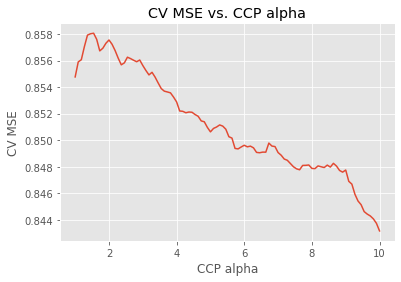

In [1318]:
ccp_alphas = grid_search.cv_results_['param_ccp_alpha'].data.astype(float)
cv_scores = grid_search.cv_results_['mean_test_score']
plt.plot(ccp_alphas, cv_scores)
plt.xlabel('CCP alpha')
plt.ylabel('CV MSE')
plt.title('CV MSE vs. CCP alpha')
plt.show()

<font color='brown'><b><I>Though the minimum value occurs at 10, choosing an optimal value where the train and test score do not differ much and also remain high.

#### <font color='green'><b>Decision Tree Regressor after Cost Complexity Pruning :

In [1331]:
dt_ccp = DecisionTreeRegressor(ccp_alpha=6.0,random_state=0)

In [1332]:
dt_ccp.fit(x_train1,y_train)

DecisionTreeRegressor(ccp_alpha=6.0, random_state=0)

<font color='cyan'><b>R2 :

In [1333]:
y_pred_dtccp = dt_ccp.predict(x_train1)

In [1385]:
r2_cc_train = r2_score(y_train,y_pred_dtccp)
print(f'R2 of train set = {r2_cc_train:.4f}')

R2 of train set = 0.9069


In [1335]:
y_pred_dtccp_test = dt_ccp.predict(x_test1)

In [1384]:
r2_cc_test = r2_score(y_test,y_pred_dtccp_test)
print(f'R2 of test set = {r2_cc_test:.4f}')

R2 of test set = 0.8524


#### <font color='green'><b>K-Nearest Neighbors (KNN) Regression :

In [1496]:
knn = KNeighborsRegressor()

In [1497]:
knn.fit(x_train1,y_train)

KNeighborsRegressor()

In [1498]:
y_pred_train_knn = knn.predict(x_train1)

In [1499]:
y_pred_test_knn = knn.predict(x_test1)

<font color='cyan'><b>R2 :

In [1500]:
r2_train_knn = r2_score(y_pred_train_knn,y_train)
print(f'R2 of train set = {r2_train_knn:.4f}')

R2 of train set = 0.6983


In [1501]:
r2_test_knn = r2_score(y_test,y_pred_test_knn)
print(f'R2 of test set = {r2_test_knn:.4f}')

R2 of test set = 0.6729


#### <font color='maroon'><b>Ensemble Methods :

#### <font color='green'><b>Random Forest Regressor :

In [1341]:
rf = RandomForestRegressor(random_state=0)

In [1342]:
rf.fit(x_train1,y_train)

RandomForestRegressor(random_state=0)

In [1343]:
y_pred_train_rf = rf.predict(x_train1)

In [1344]:
y_pred_test_rf = rf.predict(x_test1)

<font color='cyan'><b> R2 :

In [1380]:
r2_rf_train = r2_score(y_train,y_pred_train_rf)
print(f'R2 of train set = {r2_rf_train:.4f}')

R2 of train set = 0.9896


In [1381]:
r2_rf_test = r2_score(y_test,y_pred_test_rf)
print(f'R2 of train set = {r2_rf_test:.4f}')

R2 of train set = 0.9236


#### <font color='green'><b>Gradient Boosting Regressor :

In [1350]:
gbr = GradientBoostingRegressor(random_state=0)

In [1351]:
gbr.fit(x_train1,y_train)

GradientBoostingRegressor(random_state=0)

In [1352]:
y_pred_train_gb = gbr.predict(x_train1)

In [1354]:
y_pred_test_gb = gbr.predict(x_test1)

<font color='cyan'><b>R2 :

In [1377]:
r2_gb_train = r2_score(y_train,y_pred_train_gb)
print(f'R2 of train set = {r2_gb_train:.4f}')

R2 of train set = 0.7986


In [1493]:
r2_gb_test = r2_score(y_test,y_pred_test_gb)
print(f'R2 of test set = {r2_gb_test:.4f}')

R2 of test set = 0.7938


#### <font color='purple'><b>Hyper-parameter Tuning of Gradient Boosting Regressor :

<font color='orange'><b>Grid Search Cross-Validation :

In [1359]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 5, 10]}

In [1360]:
grid_srch = GridSearchCV(gbr, param_grid, cv=5)

In [1361]:
grid_srch.fit(x_train1, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [1363]:
grid_srch.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_split=5, n_estimators=300,
                          random_state=0)

In [1364]:
y_pred_train_grid = grid_srch.best_estimator_.predict(x_train1)

In [1366]:
y_pred_test_grid = grid_srch.best_estimator_.predict(x_test1)

<font color='cyan'><b>R2 :

In [1369]:
r2_train_grid = r2_score(y_pred_train_grid,y_train)
print(f'R2 of train set = {r2_train_grid:.4f}')

R2 of train set = 0.9514


In [1370]:
r2_test_grid = r2_score(y_pred_test_grid,y_test)
print(f'R2 of test set = {r2_test_grid:.4f}')

R2 of test set = 0.9196


#### <font color='green'><b>Extreme Gradient Boosting Regressor (XGBoost) :

In [1488]:
xgb = XGBRegressor(random_state=0)

In [1542]:
xgb.fit(x_train1,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1543]:
y_pred_train_xgb = xgb.predict(x_train1)

In [1544]:
y_pred_test_xgb = xgb.predict(x_test1)

<font color='cyan'><b>R2 :

In [1545]:
r2_train_xgb = r2_score(y_pred_train_xgb,y_train)
print(f'R2 of train set = {r2_train_xgb:.4f}')

R2 of train set = 0.9702


In [1546]:
r2_test_xgb = r2_score(y_test,y_pred_test_xgb)
print(f'R2 of test set = {r2_test_xgb:.4f}')

R2 of test set = 0.9323


#### <font color='purple'><b>Summary of Models :

In [1513]:
data = {'Regression Models':['Linear Regression','Linear Regression with Log Transformation', 'Decision Tree Regression',
                             'KNN Regression','Random Forest Regression','Gradient Boosting Regression',
                             'XGBoost Regression'],
       'R2_train':[r2_raw_train,r2_log,r2_cc_train,r2_train_knn,r2_rf_train,r2_train_grid,r2_train_xgb],
        'R2_test':[r2_raw_test,r2_log_test,r2_cc_test,r2_test_knn,r2_rf_test,r2_test_grid,r2_test_xgb]
       }

Models = pd.DataFrame(data)
Models = Models.sort_values('R2_test',ascending=False).reset_index(drop=True)

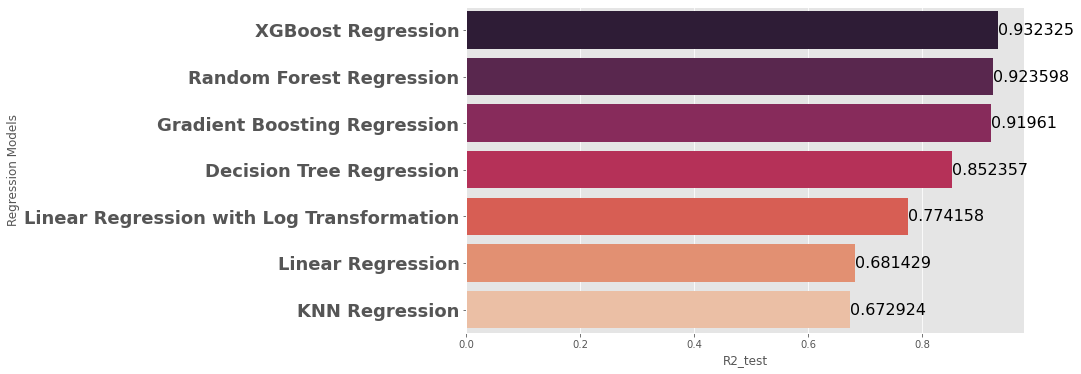

In [1524]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Models,x='R2_test',y='Regression Models',palette='rocket',ci=None)
plt.yticks(fontsize=18,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=16)

#### <font color='magenta'><b>Best Model :

<font color='hotpink'><b>XGBoost Regressor

<font color='magenta'><b>Creating sklearn Pipeline with the best model :

In [1550]:
# define the preprocessing steps for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [1551]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

In [1552]:
# combine the preprocessor and model into a single pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

In [1555]:
pipe.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['season', 'yr', 'mnth', 'hr',
                                                   'holiday', 'weekday',
                                                   'workingday',
                                                   'weathersit'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsampl...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [1557]:
y_pred = pipe.predict(x)

In [1558]:
r2 = r2_score(y_pred,y)
print(f'R2 of whole dataset with the best model = {r2:.4f}')

R2 of whole dataset with the best model = 0.9675


In [1563]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error with the best model = {mse:.2f}')
print()
print(f'Root Mean Squared Error with the best model = {rmse:.2f}')

Mean Squared Error with the best model = 1005.51

Root Mean Squared Error with the best model = 31.71


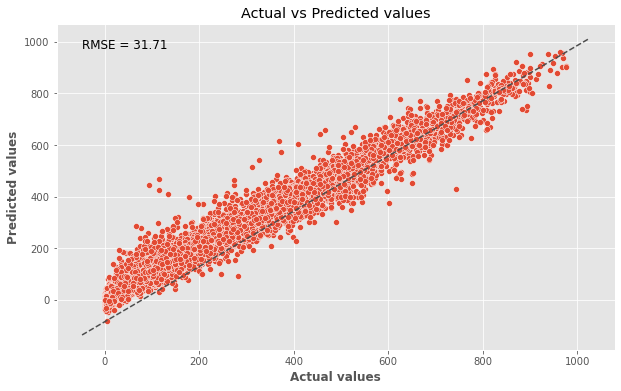

In [1573]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=y_pred)

# Add diagonal line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.plot([xmin, xmax], [ymin, ymax], ls="--", c=".3")

# Add RMSE value to plot
plt.text(xmin, ymax, f"RMSE = {rmse:.2f}", ha='left', va='top', fontsize=12)

# Set axis labels and title
plt.xlabel("Actual values",fontweight='bold')
plt.ylabel("Predicted values",fontweight='bold')
plt.title("Actual vs Predicted values")

# Show the plot
plt.show()

<font color='magenta'><b>Saving the Pipeline :

In [1574]:
file_pipe = 'F:\\pipe_xgb.pkl'

In [1575]:
pickle.dump(pipe,open(file_pipe,'wb'))